In [1]:
# 二、访问和读取数据集
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
train = pd.read_csv("C:/data/house-pre/train.csv")
test = pd.read_csv("C:/data/house-pre/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import pandas_profiling as ppf
# 探索性数据分析

In [6]:
# ppf.ProfileReport(train)

In [7]:
train.shape

(1460, 81)

C:\Users\yy\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

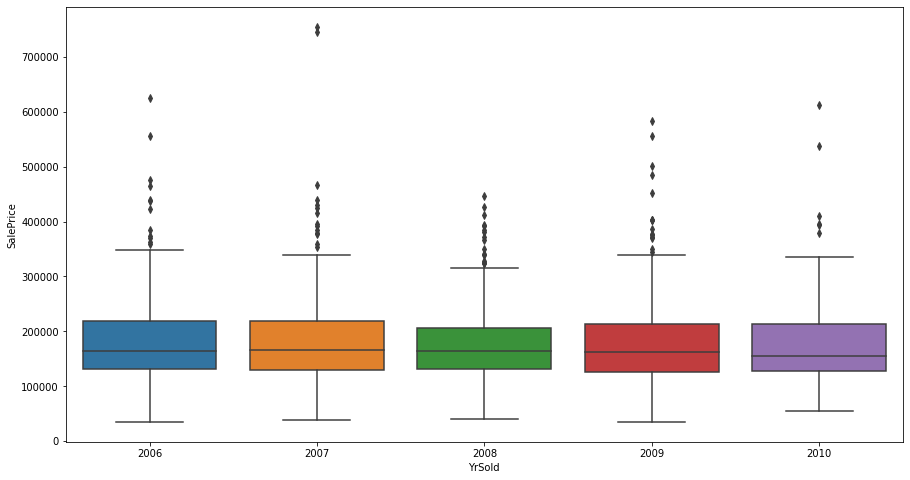

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(train.YrSold,train.SalePrice)
#

Text(0, 0.5, 'SalePrice')

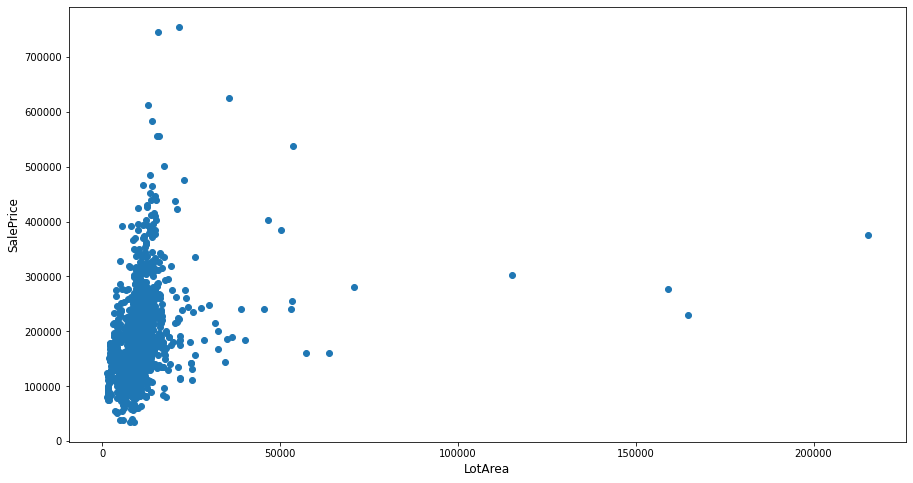

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(x = train.LotArea,y = train.SalePrice)
plt.xlabel("LotArea",fontsize=12)
plt.ylabel("SalePrice",fontsize=12)
# 用来探测线性关系

In [10]:
train.drop(train[(train.LotArea>200000)].index)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
all_features = pd.concat((train.iloc[:,1:-1],test.iloc[:,1:]))

In [13]:
numeric_features = all_features.dtypes[all_features.dtypes!='object'].index
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [14]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
# 处理数值型数据
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x :(x-x.mean())/x.std())
# 准分数可以给出数值距离均值的相对位置，计算方法是用数值减去均值所得的差除以标准差。
# 在统计上，均值和标准差不同时，不同变量的数值是不能比较的。不过，可以通过计算标准分来比较不同变量的取值。
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [16]:
# 处理离散值数据
all_features = pd.get_dummies(all_features,dummy_na=True)
all_features.head()
# dummy-na 增加一列表示空缺值，如果False就忽略空缺值

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0


In [17]:
all_features.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 331 entries, MSSubClass to SaleCondition_nan
dtypes: float64(36), uint8(295)
memory usage: 1.6 MB


In [18]:
n_data = train.shape[0]
n_data

1460

In [19]:
train_feature = torch.tensor(all_features[:n_data].values,dtype = d2l.float32)
test_feature = torch.tensor(all_features[n_data:].values,dtype = d2l.float32)
train_labels = torch.tensor(train.SalePrice.values.reshape(-1,1),dtype = d2l.float32)

In [20]:
train_feature

tensor([[ 0.0673, -0.1844, -0.2178,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.4581, -0.0720,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673, -0.0559,  0.1372,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 0.3025, -0.1416, -0.1428,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735, -0.0559, -0.0572,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.2439, -0.0293,  ...,  1.0000,  0.0000,  0.0000]])

In [21]:
test_feature

tensor([[-0.8735,  0.4581,  0.1843,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.5009,  0.5197,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.2011,  0.4643,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-0.8735,  3.8850,  1.2466,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6553, -0.3130,  0.0346,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.2011, -0.0686,  ...,  1.0000,  0.0000,  0.0000]])

In [22]:
train_labels

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [23]:
# 训练环节
loss = nn.MSELoss()
in_features = train_feature.shape[1]
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net
# orch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
# in_features – 每个输入样本的大小。out_features – 每个输出样本的大小。
# in_features指的是输入的二维张量的大小，即输入的[batch_size, size]中的size。

In [24]:
def log_rmse(net,features,lables):
     # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features),1,float('inf'))
#     参数为输入值，最小值，最大值
#     clamp函数用于约束返回值到A和B之间，若value小于min，则返回min；若value大于max，则返回max，起到上下截断的作用。
    rmse = torch.sqrt(loss(torch.log(clipped_preds),torch.log(lables)))
    return rmse.item()

In [25]:
def train(net,train_feature,train_labels,test_feature,test_labels,num_epochs,lr,wd,bacth_size):
    train_loss,test_loss = [],[]
    train_iter = d2l.load_array((train_feature,train_labels),batch_size)
    
    
#     其实就是把dataset转换为tensor,然后返回迭代器的。其中data_arrays支持多个输入对象,到时候对应接收输出就可以了。
    optimizer = torch.optim.Adam(net.parameters(),lr = lr,weight_decay = wd)
#   参数为，待优化参数列表，学习率，权重衰弱  
    for epoch in range(num_epochs):
        for X,y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            optimizer.step()
        train_loss.append(log_rmse(net,train_feature,train_labels))
        if test_labels is not None:
            test_loss.append(log_rmse(net,test_feature,test_labels))
    return train_loss,test_loss

In [26]:
# K折交叉验证取数
def get_k_fold_data(k,i,X,y):
    assert k>1
    fold_size = X.shape[0]//k
#     整数除法，它可以返回商的整数部分,向下取整.\fold-size为每一折的大小
    X_train,y_train = None,None
    for j in range(k):
        idx = slice(j*fold_size,(j+1)*fold_size)
        X_part,y_part = X[idx,:],y[idx]
        if j==i:
            X_valid,y_valid = X_part,y_part
        elif X_train is None:
            X_train,y_train = X_part,y_part
        else:
            X_train = torch.cat([X_train,X_part],0)
            y_train = torch.cat([y_train,y_part],0)
    return X_train,y_train,X_valid,y_valid


In [27]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, wd,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   wd, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'fold {i + 1}, train log rmse {float(train_ls[-1]):f}, '
              f'valid log rmse {float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k
# f''是打印字符串，:f是保留6位小数

fold 1, train log rmse 0.149076, valid log rmse 0.147733
fold 2, train log rmse 0.145975, valid log rmse 0.163739
fold 3, train log rmse 0.142511, valid log rmse 0.148172
fold 4, train log rmse 0.148306, valid log rmse 0.146722
fold 5, train log rmse 0.141914, valid log rmse 0.173611
5-折验证：平均训练 logrmse:0.145556,平均验证logrmse:0.155995


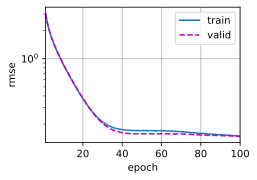

In [40]:
k,num_epochs,lr,wd,batch_size = 5,100,10,0,64
train_l,valid_l = k_fold(k,train_feature,train_labels,num_epochs,lr,wd,batch_size)
print(f'{k}-折验证：平均训练 logrmse:{float(train_l):f},'
     f'平均验证logrmse:{float(valid_l):f}')

In [41]:
def train_and_pred(train_feature,test_feature,train_labels,test,num_epochs,lr,wd,batch_size):
    net = get_net()
    train_ls, _ = train(net, train_feature, train_labels, None, None,
                        num_epochs, lr, wd, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
        # 将网络应用于测试集。
    preds = net(test_feature).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

train log rmse 0.139669


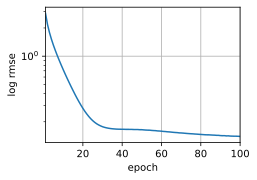

In [42]:
# 模型预测
train_and_pred(train_feature, test_feature, train_labels, test,
               num_epochs, lr, wd, batch_size)